## Importación

In [1]:
import pandas as pd
import os
import sys
# import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.dates as mdates
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

## Leer datos

In [2]:
# Agregar el directorio raíz del proyecto a sys.path
from Dict.dict_df import dict_df
project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar el diccionario desde Dict/dict_df.py
from Dict.dict_df import dict_df

In [3]:
# Definir la ruta del archivo CSV
csv_path_df = os.path.join('Data', '.ipynb_checkpoints', 'df.csv')

# Leer el CSV usando el diccionario de tipos
df = pd.read_csv(csv_path_df, dtype=dict_df, parse_dates=['Begin_Date'])

In [4]:
# df = pd.read_csv('Data\.ipynb_checkpoints\df.csv', parse_dates=['Begin_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        4849 non-null   object        
 1   Begin_Date         4849 non-null   datetime64[ns]
 2   End_Date           4849 non-null   object        
 3   Type               4849 non-null   object        
 4   Paperless_Billing  4849 non-null   object        
 5   Payment_Method     4849 non-null   object        
 6   Monthly_Charges    4849 non-null   float64       
 7   Total_Charges      4849 non-null   float64       
 8   Gender             4849 non-null   object        
 9   Senior_Citizen     4849 non-null   int64         
 10  Partner            4849 non-null   object        
 11  Dependents         4849 non-null   object        
 12  Multiple_Lines     4849 non-null   object        
 13  Internet_Service   4849 non-null   object        
 14  Online_S

## Preprocessing 

### Eliminación de la columna Customer_ID

Una vez realizada la unión de los datasets en un DataFrame __df__ ya se puede eliminar la columna __Customer_ID__ para proseguir con el preprocesamiento de los datos. De igual forma se elimna la columna __Papperless_Billing__ por considerar que al contener unicamente valores booleanos no aporta información relevante para entrenar al modelo.

In [5]:
## Convertir la columna 'End_Date' a int
df['End_Date'] = pd.to_numeric(df['End_Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        4849 non-null   object        
 1   Begin_Date         4849 non-null   datetime64[ns]
 2   End_Date           4849 non-null   int64         
 3   Type               4849 non-null   object        
 4   Paperless_Billing  4849 non-null   object        
 5   Payment_Method     4849 non-null   object        
 6   Monthly_Charges    4849 non-null   float64       
 7   Total_Charges      4849 non-null   float64       
 8   Gender             4849 non-null   object        
 9   Senior_Citizen     4849 non-null   int64         
 10  Partner            4849 non-null   object        
 11  Dependents         4849 non-null   object        
 12  Multiple_Lines     4849 non-null   object        
 13  Internet_Service   4849 non-null   object        
 14  Online_S

In [6]:
df = df.drop('Customer_ID', axis=1)
df.info()
print()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Begin_Date         4849 non-null   datetime64[ns]
 1   End_Date           4849 non-null   int64         
 2   Type               4849 non-null   object        
 3   Paperless_Billing  4849 non-null   object        
 4   Payment_Method     4849 non-null   object        
 5   Monthly_Charges    4849 non-null   float64       
 6   Total_Charges      4849 non-null   float64       
 7   Gender             4849 non-null   object        
 8   Senior_Citizen     4849 non-null   int64         
 9   Partner            4849 non-null   object        
 10  Dependents         4849 non-null   object        
 11  Multiple_Lines     4849 non-null   object        
 12  Internet_Service   4849 non-null   object        
 13  Online_Security    4849 non-null   object        
 14  Online_B

,Begin_Date,End_Date,Type,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Gender,Senior_Citizen,Partner,Dependents,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,2019-05-01,0,one year,yes,mailed check,65.6,593.30,female,0,yes,yes,no,dsl,no,yes,no,yes,yes,no
1,2019-05-01,0,month-to-month,no,mailed check,59.9,542.40,male,0,no,no,yes,dsl,no,no,no,no,no,yes
2,2019-09-01,1,month-to-month,yes,electronic check,73.9,280.85,male,0,no,no,no,fiber optic,no,no,yes,no,no,no
3,2018-12-01,1,month-to-month,yes,electronic check,98.0,1237.85,male,1,yes,no,no,fiber optic,no,yes,yes,no,yes,yes
4,2019-05-01,0,month-to-month,yes,credit card,69.4,571.45,female,0,no,yes,no,dsl,no,no,no,yes,yes,yes


### Extracción de información de la columna __Begin_Date__ y eliminación posterior

In [7]:
df['Year'] = df['Begin_Date'].dt.year
df['Month'] = df['Begin_Date'].dt.month
df['Day'] = df['Begin_Date'].dt.day
df['dow'] = df['Begin_Date'].dt.dayofweek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Begin_Date         4849 non-null   datetime64[ns]
 1   End_Date           4849 non-null   int64         
 2   Type               4849 non-null   object        
 3   Paperless_Billing  4849 non-null   object        
 4   Payment_Method     4849 non-null   object        
 5   Monthly_Charges    4849 non-null   float64       
 6   Total_Charges      4849 non-null   float64       
 7   Gender             4849 non-null   object        
 8   Senior_Citizen     4849 non-null   int64         
 9   Partner            4849 non-null   object        
 10  Dependents         4849 non-null   object        
 11  Multiple_Lines     4849 non-null   object        
 12  Internet_Service   4849 non-null   object        
 13  Online_Security    4849 non-null   object        
 14  Online_B

In [8]:
df = df.drop('Begin_Date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   End_Date           4849 non-null   int64  
 1   Type               4849 non-null   object 
 2   Paperless_Billing  4849 non-null   object 
 3   Payment_Method     4849 non-null   object 
 4   Monthly_Charges    4849 non-null   float64
 5   Total_Charges      4849 non-null   float64
 6   Gender             4849 non-null   object 
 7   Senior_Citizen     4849 non-null   int64  
 8   Partner            4849 non-null   object 
 9   Dependents         4849 non-null   object 
 10  Multiple_Lines     4849 non-null   object 
 11  Internet_Service   4849 non-null   object 
 12  Online_Security    4849 non-null   object 
 13  Online_Backup      4849 non-null   object 
 14  Device_Protection  4849 non-null   object 
 15  Tech_Support       4849 non-null   object 
 16  Streaming_TV       4849 

## Creación de features y target

In [9]:
target = df['End_Date']
features = df.drop('End_Date', axis=1)

### Guardar

In [10]:
target_path = os.path.join('Data', '.ipynb_checkpoints', 'target.csv')
features_path = os.path.join('Data', '.ipynb_checkpoints', 'features.csv')

target.to_csv('Data/.ipynb_checkpoints/target.csv', index=False)
features.to_csv('Data/.ipynb_checkpoints/features.csv', index=False)

### One-Hot Encoding

Se transformaran los datos inicialmente utilizando One-Hot Encoding para el caso de las columnas categóricas para entrenar un modelo de regresión logística.

In [11]:
df_ohe = pd.get_dummies(features, drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Monthly_Charges                  4849 non-null   float64
 1   Total_Charges                    4849 non-null   float64
 2   Senior_Citizen                   4849 non-null   int64  
 3   Year                             4849 non-null   int32  
 4   Month                            4849 non-null   int32  
 5   Day                              4849 non-null   int32  
 6   dow                              4849 non-null   int32  
 7   Type_one year                    4849 non-null   bool   
 8   Type_two year                    4849 non-null   bool   
 9   Paperless_Billing_yes            4849 non-null   bool   
 10  Payment_Method_credit card       4849 non-null   bool   
 11  Payment_Method_electronic check  4849 non-null   bool   
 12  Payment_Method_maile

#### Guardar

In [12]:
df_ohe_path = os.path.join('Data', '.ipynb_checkpoints', 'df_ohe.csv')

df_ohe.to_csv('Data/.ipynb_checkpoints/df_ohe.csv', index=False)

### Codificación de etiquetas

Se  transformaron las columnas categóricas mediante la técnica de codificación de etiquetas para ocuparlas posteriormente en el entrenamiento de modelos de árboles de decisón y bosques aleatorios.

In [13]:
encoder = OrdinalEncoder()
encoder.fit(df)
data_ordinal = encoder.transform(df)
data_ordinal = pd.DataFrame(encoder.transform(df), columns=df.columns)

print(data_ordinal.head())

   End_Date  Type  Paperless_Billing  Payment_Method  Monthly_Charges  \
0       0.0   1.0                1.0             3.0            430.0   
1       0.0   0.0                0.0             3.0            339.0   
2       1.0   0.0                1.0             2.0            564.0   
3       1.0   0.0                1.0             2.0           1001.0   
4       0.0   0.0                1.0             1.0            489.0   

   Total_Charges  Gender  Senior_Citizen  Partner  Dependents  ...  \
0         1078.0     0.0             0.0      1.0         1.0  ...   
1         1008.0     1.0             0.0      0.0         0.0  ...   
2          602.0     1.0             0.0      0.0         0.0  ...   
3         1826.0     1.0             1.0      1.0         0.0  ...   
4         1047.0     0.0             0.0      0.0         1.0  ...   

   Online_Security  Online_Backup  Device_Protection  Tech_Support  \
0              0.0            1.0                0.0           1.0   


In [14]:
data_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   End_Date           4849 non-null   float64
 1   Type               4849 non-null   float64
 2   Paperless_Billing  4849 non-null   float64
 3   Payment_Method     4849 non-null   float64
 4   Monthly_Charges    4849 non-null   float64
 5   Total_Charges      4849 non-null   float64
 6   Gender             4849 non-null   float64
 7   Senior_Citizen     4849 non-null   float64
 8   Partner            4849 non-null   float64
 9   Dependents         4849 non-null   float64
 10  Multiple_Lines     4849 non-null   float64
 11  Internet_Service   4849 non-null   float64
 12  Online_Security    4849 non-null   float64
 13  Online_Backup      4849 non-null   float64
 14  Device_Protection  4849 non-null   float64
 15  Tech_Support       4849 non-null   float64
 16  Streaming_TV       4849 

In [15]:
target_ord = data_ordinal['End_Date']
features_ord = data_ordinal.drop('End_Date', axis=1)

#### Guardar

In [17]:
data_ordinal_path = os.path.join('Data', '.ipynb_checkpoints', 'data_ordinal.csv')
target_ord_path = os.path.join('Data', '.ipynb_checkpoints', 'target_ord.csv')
features_ord_path = os.path.join('Data', '.ipynb_checkpoints', 'features_ord.csv')

data_ordinal.to_csv('Data/.ipynb_checkpoints/data_ordinal.csv', index=False)
target_ord.to_csv('Data/.ipynb_checkpoints/target_ord.csv', index=False)
features_ord.to_csv('Data/.ipynb_checkpoints/features_ord.csv', index=False)

## Segmentación de los datos

### Para regresión logística

In [18]:
# Primera división: 40% a temp, 60% para entrenamiento con estratificación
features_train, features_temp, target_train, target_temp = train_test_split(
    df_ohe, target, test_size=0.4, random_state=12345
)

# Segunda división: 50% de temp para validación y 50% para prueba con estratificación
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345
)

### Para bosques aleatorios

In [19]:
# Primera división: 40% de temp, 60% para entrenamiento
features_train_ord, features_temp_ord, target_train_ord, target_temp_ord = train_test_split(
    features_ord, target_ord, test_size=0.4, random_state=12345
)

# # Segunda división: 50% de los datos restantes de la división incial para validación y 50% para prueba
features_valid_ord, features_test_ord, target_valid_ord, target_test_ord = train_test_split(
    features_temp_ord, target_temp_ord, test_size=0.5, random_state=12345
)

## Escalamiento de caractarísticas númericas con StandardScaler.

In [20]:
numeric = ['Monthly_Charges', 'Total_Charges']

### Para regresión logística

In [21]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
print(features_train.head())

      Monthly_Charges  Total_Charges  Senior_Citizen  Year  Month  Day  dow  \
3164         0.470300      -0.849640               0  2019      6    1    5   
3989        -1.414190      -0.573924               0  2015      3    1    6   
972          0.728863       1.453072               0  2014      6    1    6   
66           0.687619      -0.457868               0  2018      7    1    6   
3969         1.152397      -0.731979               0  2019      5    1    2   

      Type_one year  Type_two year  Paperless_Billing_yes  ...  \
3164          False          False                   True  ...   
3989          False           True                  False  ...   
972           False           True                   True  ...   
66            False          False                   True  ...   
3969          False          False                   True  ...   

      Dependents_yes  Multiple_Lines_yes  Internet_Service_fiber optic  \
3164           False               False              

#### Guardar

In [22]:
features_train_path = os.path.join('Data', '.ipynb_checkpoints', 'features_train.csv')
features_valid_path = os.path.join('Data', '.ipynb_checkpoints', 'features_valid.csv')
features_test_path = os.path.join('Data', '.ipynb_checkpoints', 'features_test.csv')
target_train_path = os.path.join('Data', '.ipynb_checkpoints', 'target_train.csv')
target_valid_path = os.path.join('Data', '.ipynb_checkpoints', 'target_valid.csv')
target_test_path = os.path.join('Data', 'ipynb_checkpoints', 'target_test.csv')

features_train.to_csv(
    'Data/.ipynb_checkpoints/features_train.csv', index=False)
features_valid.to_csv(
    'Data/.ipynb_checkpoints/features_valid.csv', index=False)
features_test.to_csv(
    'Data/.ipynb_checkpoints/features_test.csv', index=False)
target_train.to_csv(
    'Data/.ipynb_checkpoints/target_train.csv', index=False)
target_valid.to_csv(
    'Data/.ipynb_checkpoints/target_valid.csv', index=False)
target_test.to_csv(
    'Data/.ipynb_checkpoints/target_test.csv', index=False)

### Para bosques aleatorios

In [23]:
scaler_ord = StandardScaler()
scaler_ord.fit(features_train_ord[numeric])
features_train_ord[numeric] = scaler_ord.transform(features_train_ord[numeric])
features_valid_ord[numeric] = scaler_ord.transform(features_valid_ord[numeric])
print(features_train_ord.head())

      Type  Paperless_Billing  Payment_Method  Monthly_Charges  Total_Charges  \
3164   0.0                1.0             0.0         0.342063      -0.872332   
3989   2.0                0.0             3.0        -1.217450      -0.311840   
972    2.0                1.0             2.0         0.713492       1.323293   
66     0.0                1.0             2.0         0.659377      -0.102560   
3969   0.0                1.0             2.0         1.306304      -0.622500   

      Gender  Senior_Citizen  Partner  Dependents  Multiple_Lines  ...  \
3164     0.0             0.0      0.0         0.0             0.0  ...   
3989     0.0             0.0      1.0         1.0             0.0  ...   
972      0.0             0.0      0.0         0.0             1.0  ...   
66       0.0             0.0      1.0         0.0             1.0  ...   
3969     1.0             0.0      1.0         1.0             0.0  ...   

      Online_Security  Online_Backup  Device_Protection  Tech_Suppor

#### Guardar

In [26]:
features_train_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'features_train_ord.csv'
)
features_valid_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'features_valid_ord.csv'
)
features_test_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'features_test_ord.csv'
)
target_train_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'target_train_ord.csv'
)
target_valid_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'target_valid_ord.csv'
)
target_test_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'target_test_ord.csv'
)


features_train_ord.to_csv(
    'Data/.ipynb_checkpoints/features_train_ord.csv', 
    index=False
)
features_valid_ord.to_csv(
    'Data/.ipynb_checkpoints/features_valid_ord.csv', 
    index=False
)
features_test_ord.to_csv(
    'Data/.ipynb_checkpoints/features_test_ord.csv', 
    index=False
)
target_train_ord.to_csv(
    'Data/.ipynb_checkpoints/target_train_ord.csv', 
    index=False
)
target_valid_ord.to_csv(
    'Data/.ipynb_checkpoints/target_valid_ord.csv', 
    index=False
)
target_test_ord.to_csv(
    'Data/.ipynb_checkpoints/target_test_ord.csv', 
    index=False
)

## Desequilibrio de clases

Comprobar el desequilibrio de las clases en la columna __'End_Date'__

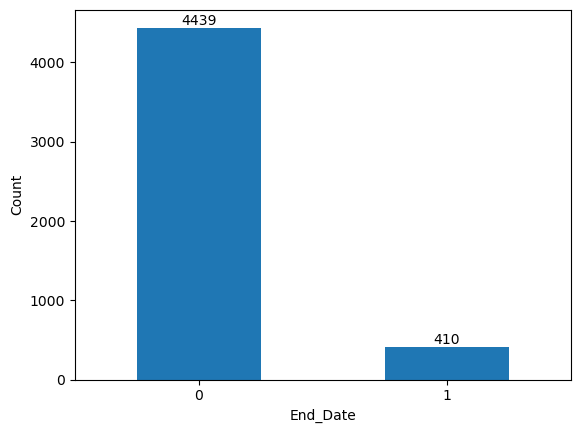

In [27]:
ax = target.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('End_Date')
plt.ylabel('Count')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()

Se observa que exite un desiquilibrio de clases en la columna target __'End_Date'__ en un proporción apróximada de 10:1 entre la clase __0__ y __1__ respectivamente. Lo anterior se puede solucionar utiiizando el sobremuestreo.

## Sobremuestreo

### Para regresión logística

#### Dividir el conjunto de datos de entrenamiento en observaciones negativas y positivas;

In [28]:
print(features_train.shape)
print(features_valid.shape)
print(target_train.shape)
print(target_valid.shape)

(2909, 25)
(970, 25)
(2909,)
(970,)


In [29]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(2665, 25)
(244, 25)
(2665,)
(244,)


In [30]:
# Definir función para realizar sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [31]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 11)

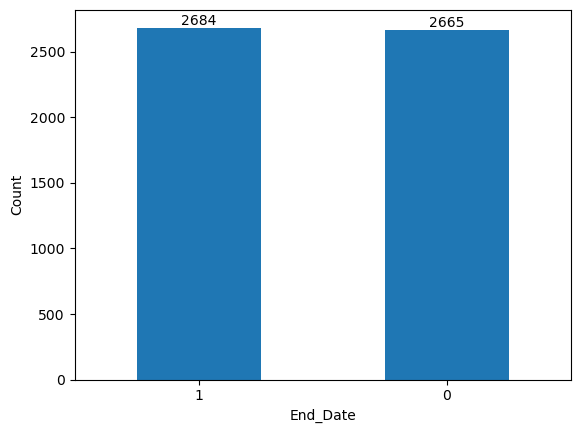

In [32]:
ax = target_upsampled.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('End_Date')
plt.ylabel('Count')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()

#### Guardar

In [33]:
features_upsampled_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'features_upsampled.csv'
)
target_upsampled_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'target_upsampled.csv'
)


features_upsampled.to_csv(
    'Data/.ipynb_checkpoints/features_upsampled.csv', 
    index=False
)
target_upsampled.to_csv(
    'Data/.ipynb_checkpoints/target_upsampled.csv', 
    index=False
)

### Para bosques aleatorios

In [34]:
print(features_train_ord.shape)
print(features_valid_ord.shape)
print(target_train_ord.shape)
print(target_valid_ord.shape)

(2909, 21)
(970, 21)
(2909,)
(970,)


In [35]:
features_zeros_ord = features_train_ord[target_train_ord == 0]
features_ones_ord = features_train_ord[target_train_ord == 1]
target_zeros_ord = target_train_ord[target_train_ord == 0]
target_ones_ord = target_train_ord[target_train_ord == 1]

print(features_zeros_ord.shape)
print(features_ones_ord.shape)
print(target_zeros_ord.shape)
print(target_ones_ord.shape)

(2665, 21)
(244, 21)
(2665,)
(244,)


In [36]:
features_upsampled_ord, target_upsampled_ord = upsample(features_train_ord, target_train_ord, 11)

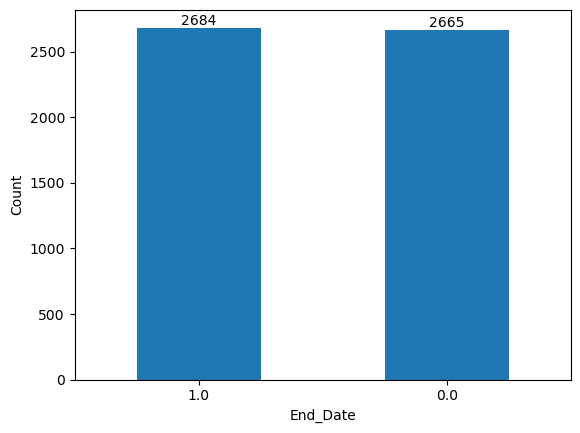

In [37]:
ax = target_upsampled_ord.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('End_Date')
plt.ylabel('Count')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()

#### Guardar

In [38]:
features_upsampled_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'features_upsampled_ord.csv' 
)
target_upsampled_ord_path = os.path.join(
    'Data', '.ipynb_checkpoints', 'target_upsampled_ord.csv'
)

features_upsampled_ord.to_csv(
    'Data/.ipynb_checkpoints/features_upsampled_ord.csv', 
    index=False
)
target_upsampled_ord.to_csv(
    'Data/.ipynb_checkpoints/target_upsampled_ord.csv', 
    index=False
)